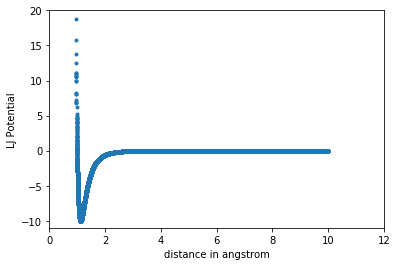

<x^2> = 32.318713341479786
<x> = 4.945056876182001
rate of acceptance =  0.8038


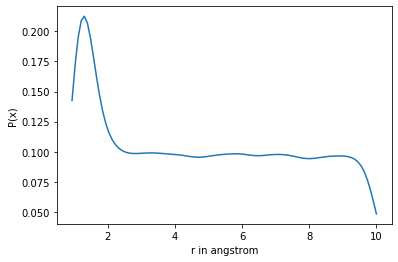

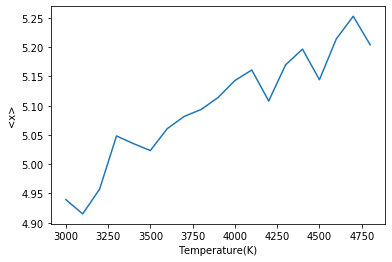

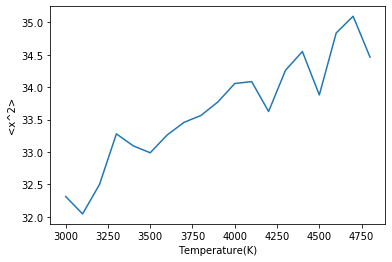

In [ ]:
import time
from datetime import datetime
import numpy as np
import sympy as sym
import math
import array
from matplotlib import pyplot as plt
from matplotlib import pyplot as sx
import matplotlib.mlab as mlab
from sklearn.neighbors import KernelDensity as kd
from scipy.stats.kde import gaussian_kde
from numpy import linspace
T = 3000
delta = 3
epsilon =10
sigma = 1
max_value = 10
min_value = 0
steps = 50000
kb = 1.98e-3
acc = 0
x1 = 4
x2 = 6
sig1 = 0.6
sig2 = 0.6
A = 1
B = 2
vy = []
vx = []
v_store= []
r_store= []
import random

def boltzmann(dE,T):
  a = (-1*dE)/(kb*T)
  exp_val = np.exp(a)
  return exp_val



def potential(x):
     v = 4*epsilon*((sigma/x)**12-(sigma/x)**6)
     return v

def cut_off(x_new):
   if x_new > max_value:
      x_new -= max_value

   elif x_new <= min_value:
      x_new += max_value
   return x_new


def move(x_ini):
    x_new = x_ini + rand_generator(-1,1)*delta
    xi = cut_off(x_new)
    return xi

def select(v_ini,v_later,x_ini,x_later,T,acc):

  if v_later < v_ini:
    v_ini = v_later
    x_ini = x_later
    acc = acc+1
  else:
    dE = v_later-v_ini
    r = rand_generator(0,1)
    bolt = boltzmann(dE,T)
    if r <= bolt:
      v_ini = v_later
      x_ini = x_later
      acc = acc +1
  return x_ini,v_ini,acc

def rand_generator(a,b):
    #now = time.time()
    #random.seed(now)
    val = random.uniform(a,b)
    return val

def fun(l):
      y = -1*(((l-x1)**2)/sig1**2)
      z = -1*((l-x2)**2/sig2**2)
      t = -np.log(A*np.exp(y)+B*np.exp(z))
      return t


r_avg =[]
temp1=[]
sqr1 = 0
r_sqr = []
def plot_averagex(temp,acc):
  for i in range(1,20):
      x_i = rand_generator(1,10)
      tot1 = x_i
      v_i = potential(x_i)
      sqr1 = x_i**2
      #v_store.append(v_ini)
      for n in range(1,steps):
                x_lat = move(x_i)
                v_lat = potential(x_lat)
                x_i, v_i,acc= select(v_i,v_lat,x_i,x_lat,temp,acc)
                tot1 = x_i+ tot1
                sqr1 = x_i**2 + sqr1
      avg1 = tot1/steps
      r_avg.append(avg1)
      temp1.append(temp)

      rsqr_avg = sqr1/steps
      r_sqr.append(rsqr_avg)
      temp= temp+100

  plt.plot(temp1,r_avg)
  plt.xlabel("Temperature(K)")
  plt.ylabel("<x>")
  plt.show()
  plt.plot(temp1,r_sqr)
  plt.xlabel("Temperature(K)")
  plt.ylabel("<x^2>")
  plt.show()

acc_rate = 0
x_ini = rand_generator(1,10)
acc = 1
tot = x_ini
sqr = x_ini**2
v_ini = potential(x_ini)
r_store.append(x_ini)
v_store.append(v_ini)
for i in range(1,steps):
    x_later = move(x_ini)
    v_later = potential(x_later)


    x_ini, v_ini,acc = select(v_ini,v_later,x_ini,x_later,T,acc)
    r_store.append(x_ini)
    v_store.append(v_ini)
    tot = x_ini+tot
    sqr = x_ini**2 + sqr

    #print(acc)
#print (acc)
#print(r_store)
#print(v_store)
acc_rate = acc/steps
plt.xlim(0,12)
plt.ylim(-11,20)
plt.xlabel("distance in angstrom")
plt.ylabel("LJ Potential")
plt.scatter(r_store,v_store,marker='.')
plt.show()
plt.pause(1)
average1 = tot/steps
average2 = sqr/steps
print("<x^2> =",average2)
print("<x> =",average1)

print("rate of acceptance = ",acc_rate)
kde = gaussian_kde( r_store )
dist_space = linspace( min(r_store), max(r_store), 100)
plt.plot( dist_space, kde(dist_space) )
plt.xlabel("r in angstrom")
plt.ylabel("P(x)")
plt.pause(1)
plot_averagex(T,acc)
plt.pause(1)